<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [14]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# ploting 
import matplotlib.pyplot as plt
import seaborn as sns

# tensorflow imports for building 
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, Adamax, RMSprop

In [3]:
def load_quickdraw10(path):
    data = np.load(path)
    X = data['arr_0']
    y = data['arr_1']
    X, y = shuffle(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=69)
    return X_train, X_test, y_train, y_test

In [4]:
q_path = '/Users/don/Desktop/u4w2/DS-Unit-4-Sprint-2-Neural-Networks/quickdraw10.npz'
X_train, X_test, y_train, y_test = load_quickdraw10(q_path)

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80000, 784)
(80000,)
(20000, 784)
(20000,)


### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [28]:
##### Your Code Here #####

def create_model(lr, optimizer):
    opt = optimizer(learning_rate=lr)
    model = Sequential([
      # input layer 
      Dense(100, activation='relu', input_dim=784),
      # hidden layer
      Dense(32, activation='relu'),
      # output layer 
      Dense(10, activation='softmax')
    ])
    model.compile(optimizer=opt, 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [19]:
def batch_model(bs):
    model = create_model(lr=0.01, optimizer=Adam)
    res = model.fit(X_train, y_train, epochs=5,
                   validation_data=(X_test, y_test),
                   batch_size=bs)
    return res

### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [20]:
bt2 = batch_model(bs=2)

Epoch 1/10
40000/40000 [==============================] - 73s 2ms/step - loss: 2.3735 - accuracy: 0.0957 - val_loss: 2.3246 - val_accuracy: 0.0984
Epoch 2/10
40000/40000 [==============================] - 67s 2ms/step - loss: 2.3664 - accuracy: 0.0995 - val_loss: 2.3612 - val_accuracy: 0.1014
Epoch 3/10
40000/40000 [==============================] - 70s 2ms/step - loss: 2.3767 - accuracy: 0.1009 - val_loss: 2.3495 - val_accuracy: 0.1001
Epoch 4/10
40000/40000 [==============================] - 68s 2ms/step - loss: 2.3768 - accuracy: 0.0974 - val_loss: 2.3733 - val_accuracy: 0.0974
Epoch 5/10
40000/40000 [==============================] - 68s 2ms/step - loss: 2.3766 - accuracy: 0.1032 - val_loss: 2.3298 - val_accuracy: 0.1042
Epoch 6/10
40000/40000 [==============================] - 78s 2ms/step - loss: 2.3767 - accuracy: 0.0985 - val_loss: 2.4324 - val_accuracy: 0.1015
Epoch 7/10
40000/40000 [==============================] - 91s 2ms/step - loss: 2.3760 - accuracy: 0.0985 - val_loss: 2

In [21]:
bt8 = batch_model(bs=8)

Epoch 1/10
10000/10000 [==============================] - 21s 2ms/step - loss: 2.3070 - accuracy: 0.1244 - val_loss: 2.3638 - val_accuracy: 0.1015
Epoch 2/10
10000/10000 [==============================] - 20s 2ms/step - loss: 2.3525 - accuracy: 0.1003 - val_loss: 2.3590 - val_accuracy: 0.0972
Epoch 3/10
10000/10000 [==============================] - 20s 2ms/step - loss: 2.3492 - accuracy: 0.1004 - val_loss: 2.3383 - val_accuracy: 0.0985
Epoch 4/10
10000/10000 [==============================] - 19s 2ms/step - loss: 2.3521 - accuracy: 0.0990 - val_loss: 2.3765 - val_accuracy: 0.1001
Epoch 5/10
10000/10000 [==============================] - 19s 2ms/step - loss: 2.3524 - accuracy: 0.0966 - val_loss: 2.3488 - val_accuracy: 0.1041
Epoch 6/10
10000/10000 [==============================] - 20s 2ms/step - loss: 2.3490 - accuracy: 0.1035 - val_loss: 2.3694 - val_accuracy: 0.1016
Epoch 7/10
10000/10000 [==============================] - 20s 2ms/step - loss: 2.3515 - accuracy: 0.1008 - val_loss: 2

In [22]:
bt20 = batch_model(bs=20)

Epoch 1/10
4000/4000 [==============================] - 10s 2ms/step - loss: 2.2743 - accuracy: 0.1324 - val_loss: 2.3148 - val_accuracy: 0.1015
Epoch 2/10
4000/4000 [==============================] - 9s 2ms/step - loss: 2.3309 - accuracy: 0.0988 - val_loss: 2.3092 - val_accuracy: 0.1016
Epoch 3/10
4000/4000 [==============================] - 10s 2ms/step - loss: 2.3283 - accuracy: 0.1035 - val_loss: 2.3333 - val_accuracy: 0.0974
Epoch 4/10
4000/4000 [==============================] - 8s 2ms/step - loss: 2.3287 - accuracy: 0.1001 - val_loss: 2.3282 - val_accuracy: 0.0996
Epoch 5/10
4000/4000 [==============================] - 8s 2ms/step - loss: 2.3290 - accuracy: 0.1016 - val_loss: 2.3225 - val_accuracy: 0.0974
Epoch 6/10
4000/4000 [==============================] - 9s 2ms/step - loss: 2.3286 - accuracy: 0.0988 - val_loss: 2.3420 - val_accuracy: 0.1015
Epoch 7/10
4000/4000 [==============================] - 10s 2ms/step - loss: 2.3298 - accuracy: 0.0998 - val_loss: 2.3302 - val_accura

In [23]:
bt32 = batch_model(bs=32)

Epoch 1/10
2500/2500 [==============================] - 6s 2ms/step - loss: 2.1992 - accuracy: 0.1705 - val_loss: 2.3136 - val_accuracy: 0.1013
Epoch 2/10
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3263 - accuracy: 0.0996 - val_loss: 2.3225 - val_accuracy: 0.0972
Epoch 3/10
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3238 - accuracy: 0.1005 - val_loss: 2.3363 - val_accuracy: 0.0996
Epoch 4/10
2500/2500 [==============================] - 6s 2ms/step - loss: 2.3233 - accuracy: 0.1001 - val_loss: 2.3144 - val_accuracy: 0.1013
Epoch 5/10
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3224 - accuracy: 0.1010 - val_loss: 2.3186 - val_accuracy: 0.0996
Epoch 6/10
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3250 - accuracy: 0.0996 - val_loss: 2.3278 - val_accuracy: 0.0984
Epoch 7/10
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3238 - accuracy: 0.0986 - val_loss: 2.3282 - val_accuracy:

In [24]:
bt100 = batch_model(bs=100)

Epoch 1/10
800/800 [==============================] - 3s 3ms/step - loss: 2.0412 - accuracy: 0.2242 - val_loss: 1.9137 - val_accuracy: 0.2684
Epoch 2/10
800/800 [==============================] - 2s 3ms/step - loss: 1.9078 - accuracy: 0.2592 - val_loss: 1.7549 - val_accuracy: 0.3074
Epoch 3/10
800/800 [==============================] - 2s 3ms/step - loss: 1.8369 - accuracy: 0.2817 - val_loss: 2.0409 - val_accuracy: 0.2250
Epoch 4/10
800/800 [==============================] - 2s 3ms/step - loss: 1.9507 - accuracy: 0.2512 - val_loss: 1.7425 - val_accuracy: 0.3686
Epoch 5/10
800/800 [==============================] - 3s 3ms/step - loss: 1.7850 - accuracy: 0.3390 - val_loss: 1.8776 - val_accuracy: 0.2558
Epoch 6/10
800/800 [==============================] - 2s 3ms/step - loss: 1.8335 - accuracy: 0.2908 - val_loss: 1.7730 - val_accuracy: 0.3327
Epoch 7/10
800/800 [==============================] - 2s 3ms/step - loss: 1.7636 - accuracy: 0.3312 - val_loss: 1.8010 - val_accuracy: 0.2625
Epoch 

In [25]:
batch_sizes = []

for exp, result in zip([bt2, bt8, bt20, bt32, bt100], ["2_", "8_", "20_", "32_", "100_"]):

    bdf = pd.DataFrame.from_dict(exp.history)
    bdf['epoch'] = bdf.index.values
    bdf['Batch Size'] = result

    batch_sizes.append(bdf)

bdf = pd.concat(batch_sizes)
bdf['Batch Size'] = bdf['Batch Size'].astype('str')
bdf.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,2.369362,0.098075,2.324553,0.09845,0,2_
1,2.368978,0.099937,2.361239,0.10135,1,2_
2,2.377697,0.099662,2.349541,0.10015,2,2_
3,2.376087,0.099525,2.373291,0.09740,3,2_
4,2.376773,0.102712,2.329812,0.10420,4,2_


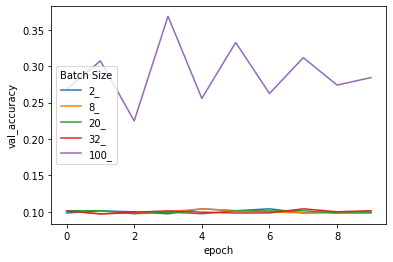

In [26]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=bdf);

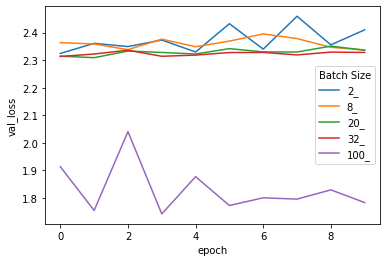

In [27]:
sns.lineplot(x='epoch', y='val_loss', hue='Batch Size', data=bdf);

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [29]:
def change_lr(lr):
    model = create_model(lr=lr, optimizer=Adam)
    res = model.fit(X_train, y_train, epochs=5,
                   validation_data=(X_test, y_test),
                   batch_size=32)
    return res

In [31]:
lr1 = change_lr(lr=1)
lr_1 = change_lr(lr=0.1)
lr_01 = change_lr(lr=0.01)
lr_001 = change_lr(lr=0.001)
lr_0001 = change_lr(lr=0.0001)

Epoch 1/5
2500/2500 [==============================] - 7s 3ms/step - loss: 7254.2573 - accuracy: 0.1011 - val_loss: 2.3867 - val_accuracy: 0.0985
Epoch 2/5
2500/2500 [==============================] - 6s 2ms/step - loss: 22933.9178 - accuracy: 0.1003 - val_loss: 2.5209 - val_accuracy: 0.1042
Epoch 3/5
2500/2500 [==============================] - 6s 2ms/step - loss: 2.4065 - accuracy: 0.0990 - val_loss: 2.4336 - val_accuracy: 0.1013
Epoch 4/5
2500/2500 [==============================] - 6s 2ms/step - loss: 2.4129 - accuracy: 0.0987 - val_loss: 2.3496 - val_accuracy: 0.1001
Epoch 5/5
2500/2500 [==============================] - 6s 2ms/step - loss: 2.4079 - accuracy: 0.1018 - val_loss: 2.4143 - val_accuracy: 0.0996
Epoch 1/5
2500/2500 [==============================] - 6s 2ms/step - loss: 55.4039 - accuracy: 0.1002 - val_loss: 2.5371 - val_accuracy: 0.0985
Epoch 2/5
2500/2500 [==============================] - 5s 2ms/step - loss: 3.7990 - accuracy: 0.1002 - val_loss: 2.3753 - val_accuracy

In [32]:
lr_sizes = []

for exp, result in zip([lr1, lr_1, lr_01, lr_001, lr_0001], ["1_", ".1_", ".01_", ".001_", ".0001_"]):

    lrdf = pd.DataFrame.from_dict(exp.history)
    lrdf['epoch'] = lrdf.index.values
    lrdf['Learning Rate'] = result

    lr_sizes.append(lrdf)

lrdf = pd.concat(lr_sizes)
lrdf['Learning Rate'] = lrdf['Learning Rate'].astype('str')
lrdf.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,7330.759277,0.099300,2.386652,0.09855,0,1_
1,8098.252930,0.100188,2.520941,0.10420,1,1_
2,2.411111,0.099588,2.433562,0.10130,2,1_
3,2.410665,0.099650,2.349645,0.10015,3,1_
4,2.409419,0.102425,2.414254,0.09960,4,1_


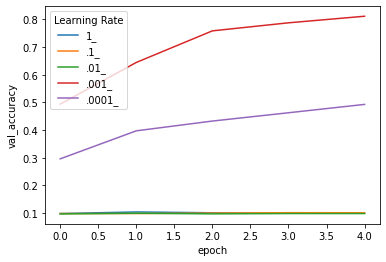

In [34]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=lrdf);

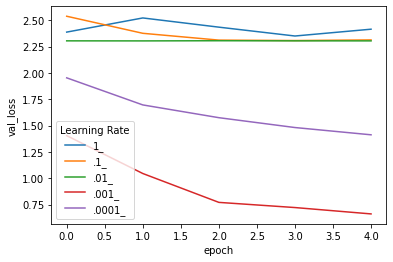

In [35]:
sns.lineplot(x='epoch', y='val_loss', hue='Learning Rate', data=lrdf);

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [36]:
def change_opt(optimizer):
    model = create_model(lr=.001, optimizer=optimizer)
    res = model.fit(X_train, y_train, epochs=5,
                   validation_data=(X_test, y_test),
                   batch_size=32)
    return res

In [37]:
adam_ = change_opt(optimizer=Adam)
sgd_ = change_opt(optimizer=SGD)
grad_ = change_opt(optimizer=Adagrad)
max_ = change_opt(optimizer=Adamax)
prop_ = change_opt(optimizer=RMSprop)

Epoch 1/5
2500/2500 [==============================] - 6s 2ms/step - loss: 4.6155 - accuracy: 0.2266 - val_loss: 1.9106 - val_accuracy: 0.2690
Epoch 2/5
2500/2500 [==============================] - 6s 3ms/step - loss: 1.7396 - accuracy: 0.3334 - val_loss: 1.5119 - val_accuracy: 0.4316
Epoch 3/5
2500/2500 [==============================] - 5s 2ms/step - loss: 1.4211 - accuracy: 0.4583 - val_loss: 1.2731 - val_accuracy: 0.5483
Epoch 4/5
2500/2500 [==============================] - 6s 2ms/step - loss: 1.0780 - accuracy: 0.6327 - val_loss: 0.8806 - val_accuracy: 0.7503
Epoch 5/5
2500/2500 [==============================] - 6s 2ms/step - loss: 0.7866 - accuracy: 0.7700 - val_loss: 0.7553 - val_accuracy: 0.7828
Epoch 1/5
2500/2500 [==============================] - 7s 3ms/step - loss: 3.6822 - accuracy: 0.1666 - val_loss: 1.9642 - val_accuracy: 0.2750
Epoch 2/5
2500/2500 [==============================] - 6s 2ms/step - loss: 1.8686 - accuracy: 0.3217 - val_loss: 1.7548 - val_accuracy: 0.3850

In [38]:
op_sizes = []

for exp, result in zip([adam_, sgd_, grad_, max_, prop_], ["adam", "sgd", "adagrad", "adamax", "rmsprop"]):

    opdf = pd.DataFrame.from_dict(exp.history)
    opdf['epoch'] = opdf.index.values
    opdf['Optimizer'] = result

    op_sizes.append(opdf)

opdf = pd.concat(op_sizes)
opdf['Optimizer'] = opdf['Optimizer'].astype('str')
opdf.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Optimizer
0,2.403433,0.253188,1.910589,0.26900,0,adam
1,1.678937,0.356587,1.511892,0.43160,1,adam
2,1.359952,0.493550,1.273067,0.54830,2,adam
3,1.002668,0.672538,0.880596,0.75035,3,adam
4,0.768217,0.774575,0.755340,0.78275,4,adam


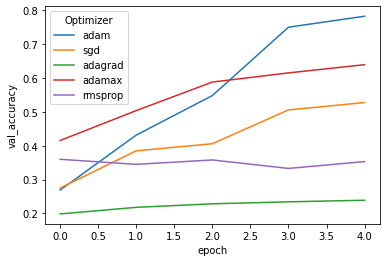

In [39]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Optimizer', data=opdf);

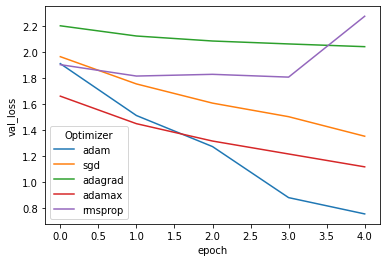

In [40]:
sns.lineplot(x='epoch', y='val_loss', hue='Optimizer', data=opdf);

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
```
Back propagation is kind of the whole point of gradient descent. After a batch is sent thru the network, the model calculates the loss function / error. back propagation takes that error and adjusts the weights at the input layer according to the learning rate & where it thinks the global minimum is.
```



## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


